In [1]:
import pandas as pd
import os.path as op
import os
from collections import Counter
import glob

In [2]:
old_vs_summaries = glob.glob("/mnt/scgc/simon/simonsproject/jb_vs_test/*/*/summary/*_contigs-summary.csv.gz")

In [90]:
len(old_vs_summaries)

16

In [5]:
sags = [op.basename(i).split('_')[0] for i in old_vs_summaries]

In [35]:
new_summaries = []

for s in old_vs_summaries:
    sag = op.basename(s).split('_')[0]
    new_summary = "/mnt/scgc/simon/simonsproject/bats248_vs/summary/{}_summary.csv".format(sag)
    new_summaries.append(new_summary)

In [7]:
s = old_vs_summaries[0]

In [8]:
sag = op.basename(s).split('_')[0]
ns = "/mnt/scgc/simon/simonsproject/bats248_vs/summary/{}_summary.csv".format(sag)
    

In [24]:
sdf = pd.read_csv(s)
nsdf = pd.read_csv(ns)

In [25]:
sdf.columns

Index(['Unnamed: 0', 'contig_length', 'gene_count', 'viral_phage_gene_count',
       'viral_phage_gene_fraction', 'viral2_phage_gene_count',
       'viral2_phage_gene_fraction', 'Similarity_1.LineP.all.fr',
       'Similarity_1.POV.fr', 'ratio_virus_bacteria', 'virus_class',
       'virus_prob'],
      dtype='object')

In [30]:
sdf_new_cols = ['contig'] + ["{}_R".format(i) for i in ['contig_length', 'gene_count', 'viral_phage_gene_count',
       'viral_phage_gene_fraction', 'viral2_phage_gene_count',
       'viral2_phage_gene_fraction', 'Similarity_1.LineP.all.fr',
       'Similarity_1.POV.fr', 'ratio_virus_bacteria', 'virus_class',
       'virus_prob']]
sdf.rename(columns = dict(zip(sdf.columns, sdf_new_cols)), inplace=True)
sdf.columns

Index(['contig', 'contig_length_R', 'gene_count_R', 'viral_phage_gene_count_R',
       'viral_phage_gene_fraction_R', 'viral2_phage_gene_count_R',
       'viral2_phage_gene_fraction_R', 'Similarity_1.LineP.all.fr_R',
       'Similarity_1.POV.fr_R', 'ratio_virus_bacteria_R', 'virus_class_R',
       'virus_prob_R'],
      dtype='object')

In [12]:
nsdf_short = nsdf[['contig','virus_class','virus_prob']]

In [19]:
sdf = sdf.rename(columns={'Unnamed: 0':'contig', 'virus_class':'virus_class_R', 'virus_prob':'virus_prob_R'})

In [20]:
sdf_short = sdf[['contig', 'virus_class_R', 'virus_prob_R']]

In [21]:
comp = pd.merge(nsdf_short, sdf_short, on='contig', how='outer')

In [91]:
len(comp)

35

In [31]:
comp_long = pd.merge(sdf, nsdf, on='contig')

In [34]:
comp_long.reindex_axis(sorted(comp_long.columns), axis=1)
comp_long.columns

Index(['contig', 'contig_length_R', 'gene_count_R', 'viral_phage_gene_count_R',
       'viral_phage_gene_fraction_R', 'viral2_phage_gene_count_R',
       'viral2_phage_gene_fraction_R', 'Similarity_1.LineP.all.fr_R',
       'Similarity_1.POV.fr_R', 'ratio_virus_bacteria_R', 'virus_class_R',
       'virus_prob_R', 'hit_mg-bac', 'hit_mg-vir', 'reads_mg-vir',
       'reads_mg-bac', 'contig_length', 'fr_mg-bac', 'fr_mg-vir',
       'ratio_virus_bacteria', 'p1', 'p2', 'total_orfs',
       'viral_phage_gene_fraction', 'viral2_phage_gene_fraction',
       'virus_class', 'virus_prob', 'virus_prob_new'],
      dtype='object')

In [67]:
odf = pd.concat([pd.read_csv(i) for i in old_vs_summaries])
ndf = pd.concat([pd.read_csv(i) for i in new_summaries])

In [68]:
odf_new_cols = ['contig'] + ["{}_R".format(i) for i in ['contig_length', 'gene_count', 'viral_phage_gene_count',
       'viral_phage_gene_fraction', 'viral2_phage_gene_count',
       'viral2_phage_gene_fraction', 'Similarity_1.LineP.all.fr',
       'Similarity_1.POV.fr', 'ratio_virus_bacteria', 'virus_class',
       'virus_prob']]

In [69]:
odf.rename(columns = dict(zip(odf.columns, odf_new_cols)), inplace=True)

In [70]:
df = pd.merge(odf, ndf, on='contig', how='outer')

In [41]:
len(df)

457

In [43]:
len(ndf)

456

In [48]:
df.columns

Index(['contig', 'contig_length_R', 'gene_count_R', 'viral_phage_gene_count_R',
       'viral_phage_gene_fraction_R', 'viral2_phage_gene_count_R',
       'viral2_phage_gene_fraction_R', 'Similarity_1.LineP.all.fr_R',
       'Similarity_1.POV.fr_R', 'ratio_virus_bacteria_R', 'virus_class_R',
       'virus_prob_R', 'hit_mg-bac', 'hit_mg-vir', 'reads_mg-vir',
       'reads_mg-bac', 'contig_length', 'fr_mg-bac', 'fr_mg-vir',
       'ratio_virus_bacteria', 'p1', 'p2', 'total_orfs',
       'viral_phage_gene_fraction', 'viral2_phage_gene_fraction',
       'virus_class', 'virus_prob', 'virus_prob_new'],
      dtype='object')

In [47]:
%matplotlib inline  

import matplotlib
import scipy.cluster.hierarchy as sch
import numpy
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

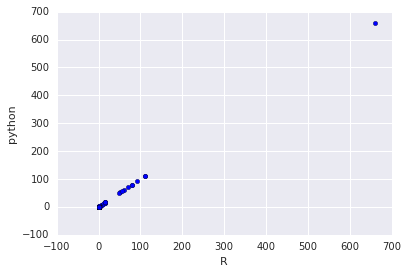

In [61]:
plt.scatter(df['ratio_virus_bacteria_R'],df['ratio_virus_bacteria'])
plt.ylabel('python')
plt.xlabel('R')

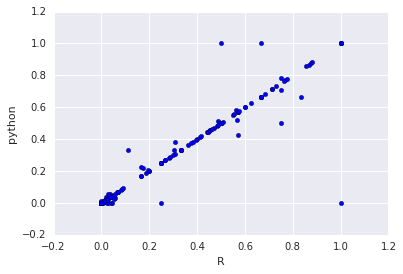

In [62]:
plt.scatter(df['viral_phage_gene_fraction_R'], df['viral_phage_gene_fraction'])
plt.ylabel('python')
plt.xlabel('R')

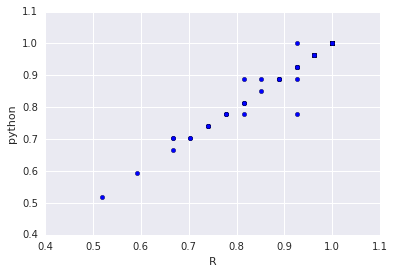

In [95]:
tdf = df[df['virus_prob_R'] != -1 ]

plt.scatter(tdf['virus_prob_R'], tdf['virus_prob'])
plt.ylabel('python')
plt.xlabel('R')

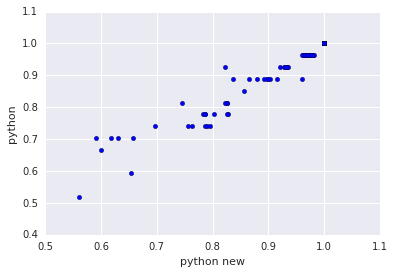

In [98]:
tdf = df[df['virus_prob_R'] != -1 ]

plt.scatter(tdf['virus_prob_new'], tdf['virus_prob'])
plt.plot(1,1)
plt.ylabel('python')
plt.xlabel('python new')

In [60]:
df[abs(df['viral_phage_gene_fraction_R'] - df['viral_phage_gene_fraction']) > 0.1][['contig', 'contig_length_R', 'gene_count_R', 'viral_phage_gene_fraction_R', 'total_orfs',
       'viral_phage_gene_fraction']]

,contig,contig_length_R,gene_count_R,viral_phage_gene_fraction_R,total_orfs,viral_phage_gene_fraction
140,AG-894-C07_NODE_30,5036,4.0,0.250000,4.0,0.000000
200,AG-903-I06_NODE_12,10602,2.0,0.500000,2.0,1.000000
310,AG-908-F15_NODE_42,6188,9.0,0.111111,9.0,0.333333
412,AG-913-C05_NODE_11,7363,7.0,0.571429,7.0,0.428571
421,AG-913-C05_NODE_21,2984,4.0,0.750000,4.0,0.500000
425,AG-913-C05_NODE_24,2062,3.0,0.666667,3.0,1.000000
439,AG-913-C17_NODE_14,6826,6.0,0.833333,6.0,0.666667
451,AG-913-C17_NODE_26,2620,1.0,1.000000,1.0,0.000000


In [59]:
df.columns

Index(['contig', 'contig_length_R', 'gene_count_R', 'viral_phage_gene_count_R',
       'viral_phage_gene_fraction_R', 'viral2_phage_gene_count_R',
       'viral2_phage_gene_fraction_R', 'Similarity_1.LineP.all.fr_R',
       'Similarity_1.POV.fr_R', 'ratio_virus_bacteria_R', 'virus_class_R',
       'virus_prob_R', 'hit_mg-bac', 'hit_mg-vir', 'reads_mg-vir',
       'reads_mg-bac', 'contig_length', 'fr_mg-bac', 'fr_mg-vir',
       'ratio_virus_bacteria', 'p1', 'p2', 'total_orfs',
       'viral_phage_gene_fraction', 'viral2_phage_gene_fraction',
       'virus_class', 'virus_prob', 'virus_prob_new'],
      dtype='object')

In [ ]:
['contig', 'contig_length_R', 'gene_count_R', 'viral_phage_gene_fraction_R', 'total_orfs',
       'viral_phage_gene_fraction']

In [87]:
df['virus_class_R_val'] = [1 if str(i) in ['TRUE','True'] else 0 for i in df['virus_class_R']]

In [89]:
print(df[df['virus_class'] != df['virus_class_R_val']][['contig', 'contig_length_R', 'gene_count_R', 'viral_phage_gene_fraction_R', 'total_orfs',
       'viral_phage_gene_fraction','ratio_virus_bacteria','ratio_virus_bacteria_R','virus_class','virus_class_R','virus_class_R_val','virus_prob','virus_prob_R']].dropna())

                 contig  contig_length_R  gene_count_R  \
140  AG-894-C07_NODE_30             5036           4.0   
198  AG-903-I06_NODE_10            12198          14.0   

     viral_phage_gene_fraction_R  total_orfs  viral_phage_gene_fraction  \
140                     0.250000         4.0                   0.000000   
198                     0.071429        14.0                   0.071429   

     ratio_virus_bacteria  ratio_virus_bacteria_R  virus_class virus_class_R  \
140              71.49908                71.49908          0.0          True   
198               9.85276                 9.85276          0.0          TRUE   

     virus_class_R_val  virus_prob  virus_prob_R  
140                  1    1.000000      0.925926  
198                  1    0.518519      0.518519  


In [92]:
len(df)

457

In [93]:
Counter(df['virus_class'])

Counter({0.0: 426,
         1.0: 24,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1})